In [21]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('C:/Users/wjdqh/injige/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
df.columns
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


# 분류용 데이터 준비
X = df.drop(['Outcome'], axis=1).values
y = df['Outcome'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [23]:
# 로지스틱 회귀 모델
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 2)

    def forward(self, x):
        return self.linear(x)

# 학습 함수
def train(model, X, y):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(200):
        model.train()
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

Logistic Regression Accuracy: 0.7467532467532467
Random Forest Accuracy: 0.7207792207792207


C:\Users\wjdqh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjdqh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjdqh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjdqh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjdqh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

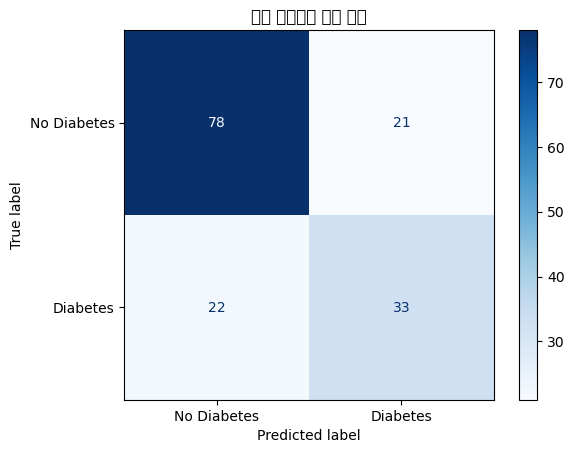

In [24]:
# 실행
if __name__ == '__main__':
    input_dim = X.shape[1]

    # 로지스틱 회귀
    model1 = LogisticRegressionModel(input_dim)
    train(model1, X_train_tensor, y_train_tensor)
    pred1 = model1(X_test_tensor).argmax(1).detach().numpy()
    acc1 = accuracy_score(y_test, pred1)
    print("Logistic Regression Accuracy:", acc1)

    # 랜덤 포레스트
    model2 = RandomForestClassifier(n_estimators=100, random_state=42)
    model2.fit(X_train, y_train)
    pred2 = model2.predict(X_test)
    acc2 = accuracy_score(y_test, pred2)
    print("Random Forest Accuracy:", acc2)

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
    disp.plot(cmap='Blues')
    plt.title("랜덤 포레스트 혼동 행렬")
    plt.show()